In [12]:
import numpy as np
from nsdcode import NSDmapdata
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_schaefer_2018
import matplotlib.pyplot as plt

In [ ]:
# can be changed to other resolutions
atlas = fetch_atlas_schaefer_2018()

In [ ]:
# you need to run this locally with the data_base dir available with this file
# s3://natural-scenes-dataset/nsddata/ppdata/subj01/transforms/MNI-to-func1pt8.nii.gz
# nsd_map = NSDmapdata(base_dir=data_base)
# transformeddata = nsd_map.fit(subjix=1, sourcespace="MNI", targetspace="func1pt8", sourcedata=atlas["maps"], interptype ="nearest", badval=np.nan, outputfile="./data/Schaefer2018_400Parcels_7Networks_order.func1pt8.nii.gz")

In [1]:
# standarized: zscored
masker = NiftiLabelsMasker("nsd-data/Schaefer2018_400Parcels_7Networks_order.func1pt8.nii.gz", labels=atlas["labels"], standardize=True)

In [3]:
parcellated_ts = masker.fit_transform("shared/NSD/nsddata_timeseries/ppdata/subj01/func1pt8mm/timeseries/timeseries_session21_run01.nii.gz")

In [6]:
parcellated_ts.shape

(226, 400)

In [26]:
# use decode() to change from b to str
atlas["labels"]

array([b'7Networks_LH_Vis_1', b'7Networks_LH_Vis_2',
       b'7Networks_LH_Vis_3', b'7Networks_LH_Vis_4',
       b'7Networks_LH_Vis_5', b'7Networks_LH_Vis_6',
       b'7Networks_LH_Vis_7', b'7Networks_LH_Vis_8',
       b'7Networks_LH_Vis_9', b'7Networks_LH_Vis_10',
       b'7Networks_LH_Vis_11', b'7Networks_LH_Vis_12',
       b'7Networks_LH_Vis_13', b'7Networks_LH_Vis_14',
       b'7Networks_LH_Vis_15', b'7Networks_LH_Vis_16',
       b'7Networks_LH_Vis_17', b'7Networks_LH_Vis_18',
       b'7Networks_LH_Vis_19', b'7Networks_LH_Vis_20',
       b'7Networks_LH_Vis_21', b'7Networks_LH_Vis_22',
       b'7Networks_LH_Vis_23', b'7Networks_LH_Vis_24',
       b'7Networks_LH_Vis_25', b'7Networks_LH_Vis_26',
       b'7Networks_LH_Vis_27', b'7Networks_LH_Vis_28',
       b'7Networks_LH_Vis_29', b'7Networks_LH_Vis_30',
       b'7Networks_LH_Vis_31', b'7Networks_LH_SomMot_1',
       b'7Networks_LH_SomMot_2', b'7Networks_LH_SomMot_3',
       b'7Networks_LH_SomMot_4', b'7Networks_LH_SomMot_5',
       b'

In [25]:
# this is how you might filter some regions based on name parts
np.array([idx for idx, name in enumerate(atlas["labels"]) if "Vis" in name.decode()])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229])

In [17]:
fc = np.corrcoef(parcellated_ts.T)

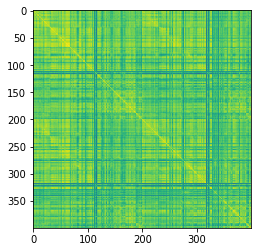

In [24]:
plt.imshow(fc)

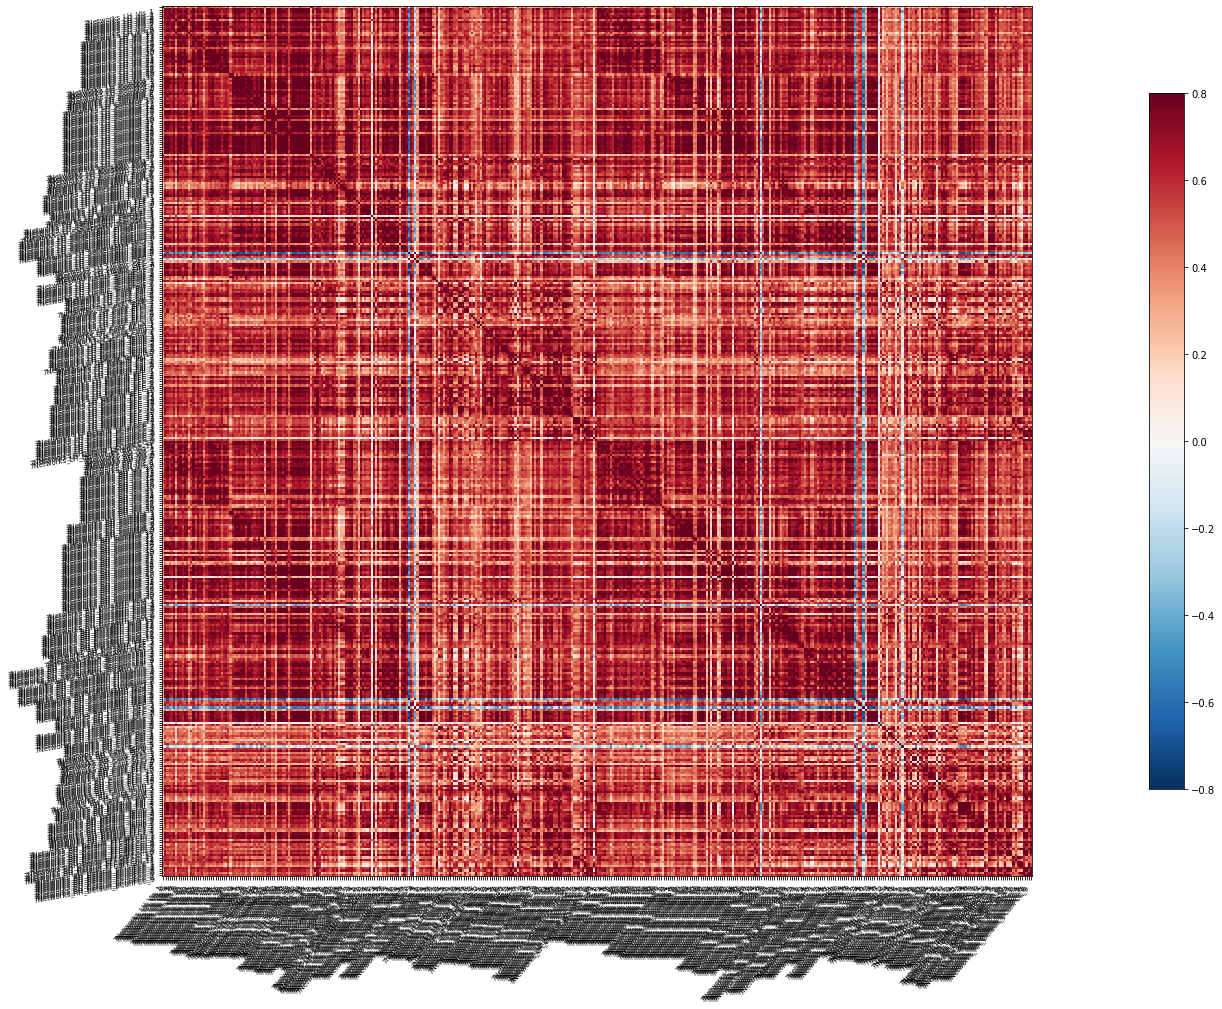

In [20]:
# or, nilearn way to plot it
from nilearn.plotting import plot_matrix
plot_matrix(fc, figure=(20, 16), labels=[_.decode() for _ in atlas["labels"]], vmax=0.8, vmin=-0.8, reorder=False)